# MATH 210 Introduction to Mathematical Computing

**February 28, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Consider $y' = f(t,y)$, $y(t_0) = y_0$. Euler's method is the recursive sequence:

$$
y_{n+1} = y_n + f(t_n,y_n) h \ , \ \ t_n = t_0 + n h
$$

Apply Euler's method to $y' = t - y$, $y(0) = 1$. We know the exact solution is $y(t) = 2e^{-t} + t - 1$.

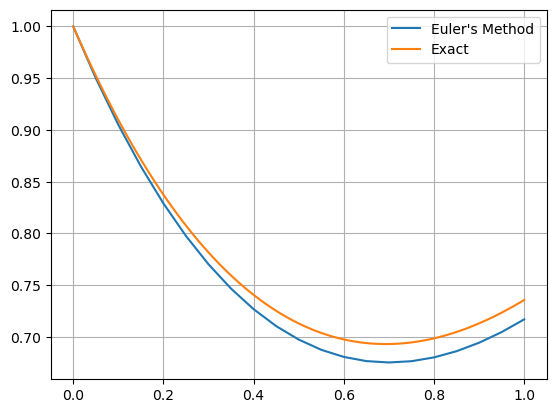

In [5]:
f = lambda t,y: t - y
t0 = 0; y0 = 1;
tf = 1;
N = 20; h = (tf - t0)/N;

t = np.linspace(t0,tf,N+1) # t = [t0 + n*h for n in range(N+1)]
y = np.zeros(N+1) # y = [0 for n in range(N+1)]

y[0] = y0

for n in range(N):
    y[n+1] = y[n] + f(t[n],y[n])*h

plt.plot(t,y,label="Euler's Method")
texact = np.linspace(t0,tf,(tf - t0)*100)
yexact = 2*np.exp(-texact) + texact - 1
plt.plot(texact,yexact,label="Exact")
plt.legend(), plt.grid(True)
plt.show()

Note that increasing $N$ reduces the error but requires more computations.

Write a function called `odeEuler` which takes input parameters `f`, `t`, `y0` where:

* `f` is a function which represents the differential equation $y' = f(t,y)$
* `t` is a vector of $t$ values starting at $t_0$
* `y0` is the initial value $y(t_0) = y_0$

The function returns the vector of $y$ values $y_n$.

In [6]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

Consider $y' = -y$, $y(0)=1$. We know the solution is $y(t) = e^{-t}$.

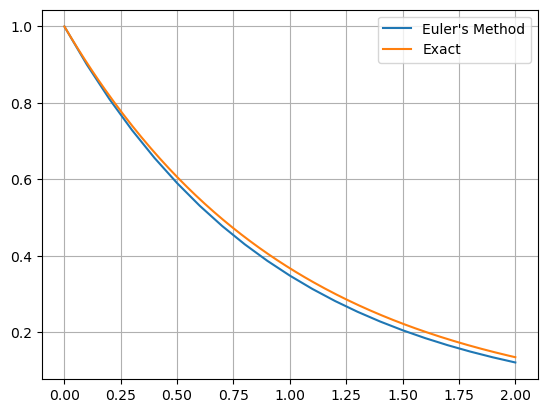

In [8]:
f = lambda t,y: -y
t0 = 0; y0 = 1;
tf = 2;
N = 20; h = (tf - t0)/N;

t = np.linspace(t0,tf,N+1) # t = [t0 + n*h for n in range(N+1)]
y = odeEuler(f,t,y0)

plt.plot(t,y,label="Euler's Method")
texact = np.linspace(t0,tf,(tf - t0)*100)
yexact = np.exp(-texact)
plt.plot(texact,yexact,label="Exact")
plt.legend(), plt.grid(True)
plt.show()

Consider $y' = -ty^2$, $y(0)=1$. We know the solution is $y(t) = \frac{1}{t^2/2 + 1}$.

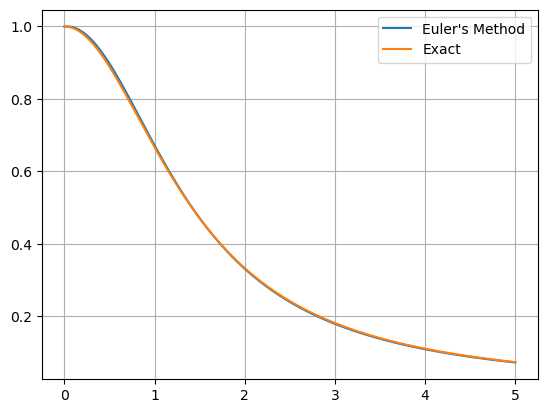

In [10]:
f = lambda t,y: -t*y**2
t0 = 0; y0 = 1;
tf = 5;
N = 100; h = (tf - t0)/N;

t = np.linspace(t0,tf,N+1) # t = [t0 + n*h for n in range(N+1)]
y = odeEuler(f,t,y0)

plt.plot(t,y,label="Euler's Method")

texact = np.linspace(t0,tf,(tf - t0)*100)
yexact = 1/(texact**2/2 + 1)
plt.plot(texact,yexact,label="Exact")
plt.legend(), plt.grid(True)
plt.show()

## Systems of Differential Equations

Consider a first order 2-dimensional linear autonomous system of differential equations

\begin{align*}
x' &= ax + by \\
y' &= cx + dy
\end{align*}

with initial values $x(t_0) = x_0$ and $y(t_0) = y_0$. How do we apply Euler's method to a system? Apply Euler's method to each equation!

\begin{align*}
x_{n+1} &= x_n + (ax_n + by_n) h \\
y_{n+1} &= y_n + (cx_n + dy_n)h
\end{align*}

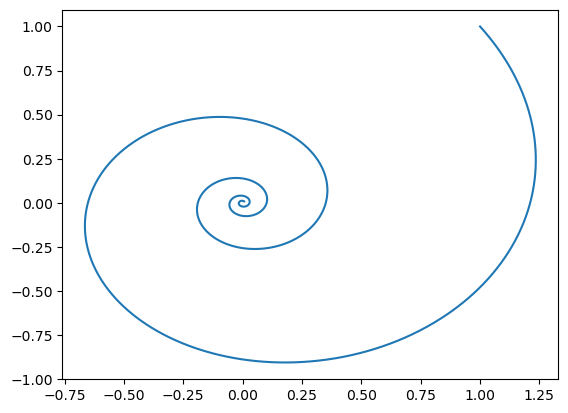

In [24]:
a = -1; b = 5; c = -5; d = -1;
fx = lambda t,x,y: a*x + b*y
fy = lambda t,x,y: c*x + d*y

t0 = 0; tf = 5;
x0 = 1; y0 = 1;

N = 5000
h = (tf - t0)/N

t = np.linspace(t0,tf,N+1)

x = np.zeros(N+1)
x[0] = x0

y = np.zeros(N+1)
y[0] = y0

for n in range(N):
    x[n+1] = x[n] + fx(t[n],x[n],y[n])*h
    y[n+1] = y[n] + fy(t[n],x[n],y[n])*h

plt.plot(x,y)
plt.show()